In [1]:
import scvelo as scv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, ConstantKernel as C

np.random.seed(1)

colormap_celltype = {"earlyNC":"#999999", "neural_glial":"#E69F00", "skeletal":"#56B4E9", "pigment": "#009E73", "unassigned":"#F0E442"}
colormap_realtime = {"12hpf":'#636EFA', "14hpf":'#EF553B', "18hpf":'#00CC96', "20hpf":'#AB63FA', "24hpf":'#FFA15A', "30hpf":'#19D3F3'}

In [2]:
ifname = "./data/WT/Arch1_new_aggregate_filtered_noNT.loom"

In [3]:
adata = sc.read_loom(ifname)

In [4]:
adata.X = adata.layers["norm_data"]

In [5]:
celltypes_cellassign = np.array( pd.read_csv("./data/cellassign/celltypes.csv", index_col=0)['x'], str )
cellprobs_cellassign = np.array( pd.read_csv("./data/cellassign/cellprobs.csv", index_col=0), float )
for i in range(len(celltypes_cellassign)):
    if celltypes_cellassign[i] == 'other':
        celltypes_cellassign[i] = 'unassigned'
adata.obs['cellassign'] = pd.Series(celltypes_cellassign, index=adata.obs_names, dtype='category')

In [6]:
df_ms_progression = pd.read_csv("./data/simplified_progressions.csv", index_col=0)

In [7]:
x_dendro = []
for cellid in adata.obs_names:
    ms = df_ms_progression.loc[df_ms_progression['cell_id']==cellid,['from','to']].values[0]
    percent = df_ms_progression.loc[df_ms_progression['cell_id']==cellid,['percentage']].values[0][0]
    if ms[0] == 2 and ms[1] == 7:
        tmp_pt = [percent, 0]
    elif ms[0] == 7 and ms[1] == 13:
        tmp_pt = [percent+1.0, 2]
    elif ms[0] == 7 and ms[1] == 3:
        tmp_pt = [percent+1.0, -1]
    elif ms[0] == 3 and ms[1] == 12:
        tmp_pt = [percent+2.0, 0]
    elif ms[0] == 3 and ms[1] == 10:
        tmp_pt = [0.25*percent+2.0, -2]
    x_dendro.append(tmp_pt)
x_dendro = np.array(x_dendro)
x_dendro[:,1] += 0.15 * np.random.normal(size=1284)

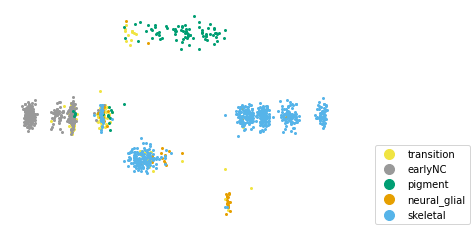

In [9]:
cellassign_labels = np.array(adata.obs['cellassign'])
for ctype in ["unassigned", "earlyNC", "pigment", "neural_glial", "skeletal"]:
    if ctype == "unassigned":
        label = "transition"
    else:
        label = ctype
    tmp_idx = np.where(cellassign_labels == ctype)[0]
    plt.scatter(x_dendro[tmp_idx,0], x_dendro[tmp_idx,1], c=colormap_celltype[ctype], label=label, s=4)
plt.axis("off")
plt.legend(loc=[1.1,0.0], markerscale=5)
plt.savefig("./figures/dendro_scaled_cellassign.pdf", bbox_inches='tight')

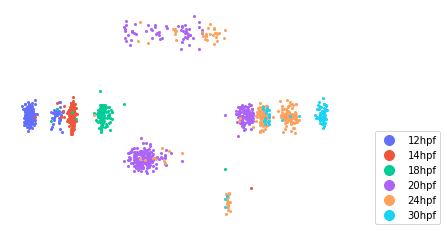

In [10]:
realtime = np.array( adata.obs["orig_ident"] )
for time in ["12hpf","14hpf", "18hpf", "20hpf", "24hpf", "30hpf"]:
    tmp_idx = np.where(realtime == time)[0]
    plt.scatter(x_dendro[tmp_idx,0], x_dendro[tmp_idx,1], c=colormap_realtime[time], label=time, s=4)
plt.axis("off")
plt.legend(loc=[1.1,0.0], markerscale=5)
plt.savefig("./figures/dendro_scaled_realtime.pdf", bbox_inches='tight')

In [11]:
adata_paga = sc.read_h5ad("./data/adata_paga.h5ad")

In [12]:
x_paga = adata_paga.obsm["X_draw_graph_fa"]

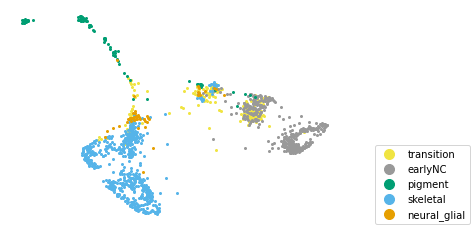

In [13]:
cellassign_labels = np.array(adata.obs['cellassign'])
for ctype in ["unassigned", "earlyNC", "pigment", "skeletal", "neural_glial"]:
    if ctype == "unassigned":
        label = "transition"
    else:
        label = ctype
    tmp_idx = np.where(cellassign_labels == ctype)[0]
    plt.scatter(x_paga[tmp_idx,0], x_paga[tmp_idx,1], c=colormap_celltype[ctype], label=label, s=4)
plt.axis("off")
plt.legend(loc=[1.1,0.0], markerscale=5)
plt.savefig("./figures/paga_embedding_cellassign.pdf", bbox_inches='tight')

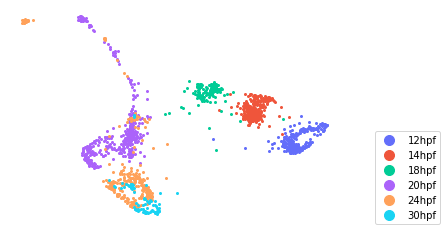

In [14]:
realtime = np.array( adata.obs["orig_ident"] )
for time in ["12hpf","14hpf", "18hpf", "20hpf", "24hpf", "30hpf"]:
    tmp_idx = np.where(realtime == time)[0]
    plt.scatter(x_paga[tmp_idx,0], x_paga[tmp_idx,1], c=colormap_realtime[time], label=time, s=4)
plt.axis("off")
plt.legend(loc=[1.1,0.0], markerscale=5)
plt.savefig("./figures/paga_embedding_realtime.pdf", bbox_inches='tight')